In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def create_dataframe(path):

    file_path = path
    with open(file_path, 'r') as f:
        data = f.read()
    
    data = [i for i in data.split(' ') if i != '']
    
    first_batch = [7,8,9,10,11]
    second_batch = [31,32,33,34]
    epoch_size = 35
    n_epochs = len(data)/epoch_size
    
    data_dict = {'Epoch':[],
                 'GPU_mem':[],
                 'box_loss':[],
                 'cls_loss':[],
                 'dfl_loss':[],
                 'Precision':[],
                 'Recall':[],
                 'mAP50':[],
                 'mAP50-95':[],
                }
    
    for i in range(100):
        for j,k in enumerate(first_batch + second_batch):
            data_dict[list(data_dict.keys())[j]] = data_dict[list(data_dict.keys())[j]] + [data[k+i*epoch_size]]
    
    data_df = pd.DataFrame(data_dict).replace('\n','',regex=True).replace('/100','',regex=True).replace('G','',regex=True)
    cols = data_df.columns
    
    data_df[cols] = data_df[cols].apply(pd.to_numeric, errors='coerce')
    
    return data_df

In [3]:
data_df_1 = create_dataframe('yolo_train_metrics.txt')
data_df_2 = create_dataframe('yolo_again_train_metrics.txt')
data_df_2['Epoch'] = data_df_2['Epoch']+100

data_df = pd.concat([data_df_1,data_df_2]).reset_index(drop=True)

C:\Users\eduar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


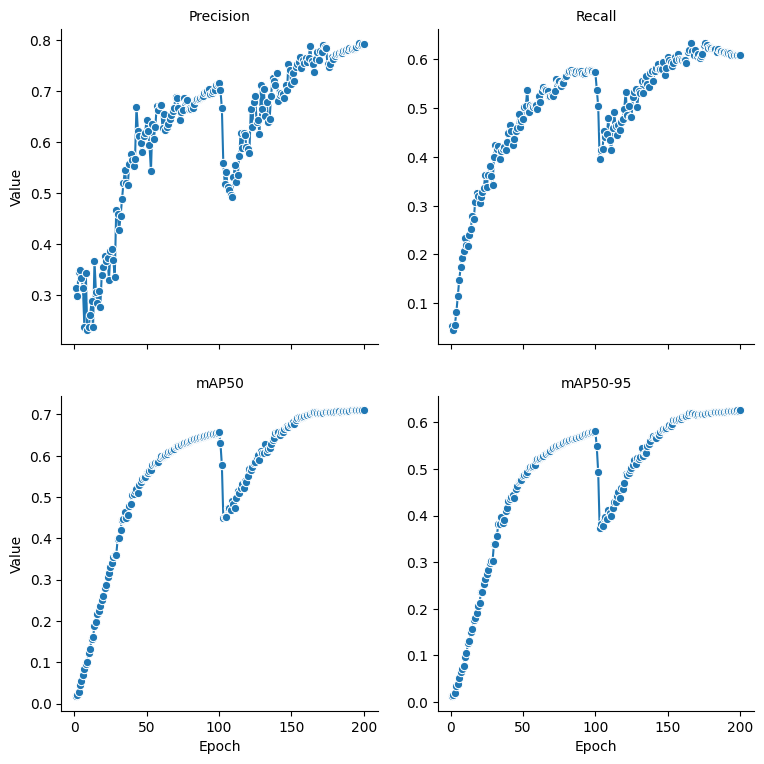

In [20]:
melted_df = data_df[['Epoch','Precision','Recall','mAP50','mAP50-95']].melt(id_vars="Epoch", var_name="Metric", value_name="Value")

# FacetGrid to create one plot per metric
g = sns.FacetGrid(melted_df, col="Metric", col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, "Epoch", "Value", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Epoch", "Value")
g.tight_layout(pad=2)

# Show the plots
plt.show()

g.savefig('1.png')

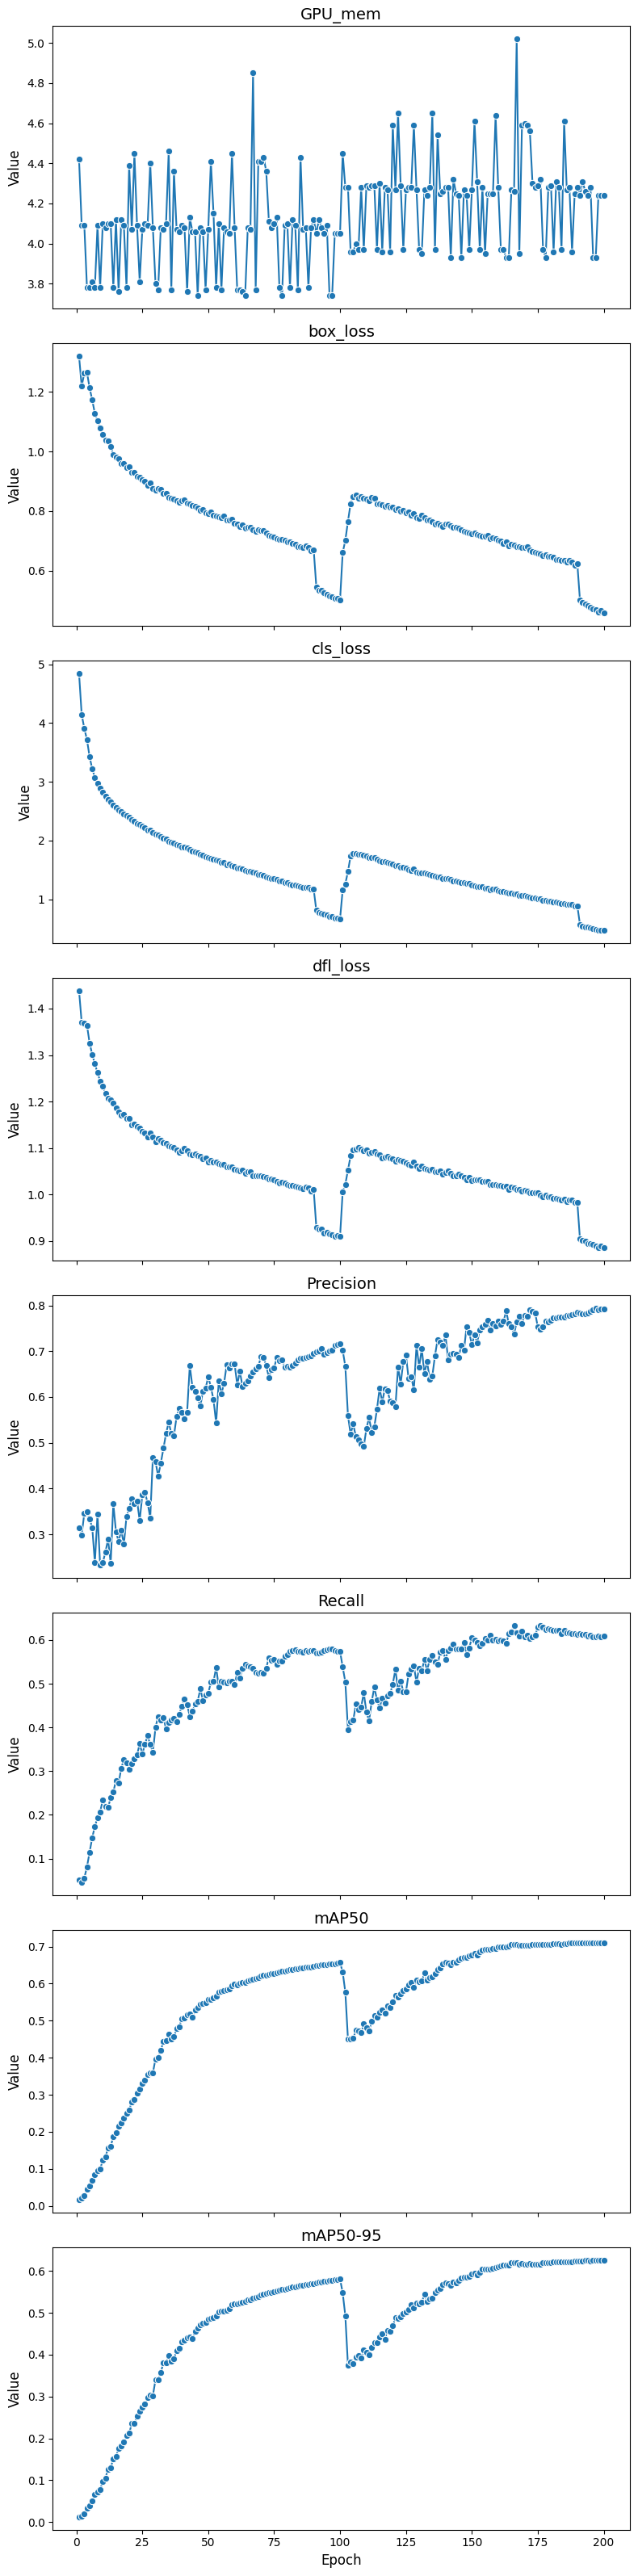

In [7]:
# Plot each metric in a separate subplot
metrics = [col for col in data_df.columns if col != "Epoch"]

fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 4 * len(metrics)), sharex=True)

for i, metric in enumerate(metrics):
    sns.lineplot(ax=axes[i], data=data_df, x="Epoch", y=metric, marker="o")
    axes[i].set_title(metric, fontsize=14)
    axes[i].set_ylabel("Value", fontsize=12)
    fig.savefig(f"{metric}.png") 

axes[-1].set_xlabel("Epoch", fontsize=12)  # Label x-axis for the last subplot
plt.tight_layout()
plt.show()